In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:

norm = np.random.normal(0, 1, [4, 1000])
logNorm = np.random.lognormal(0, 1, [2, 1000])
event = np.random.uniform(0, 1, [2, 1000])

print(f'normal : {norm} \n log normal: {logNorm} \n evently: {event}')

NameError: name 'np' is not defined

In [ ]:
# count, bins, ignored = plt.hist(norm, 15, density=True)
# plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
# plt.plot(norm[1], norm[2])

plt.figure(1)
plt.scatter(norm[0], norm[1], color='red')
plt.title("Normal distribution")
# plt.show()

plt.figure(2)
plt.scatter(logNorm[0], logNorm[1], color='blue')
plt.title("Lognormal distribution")
# plt.show()


plt.figure(3)
plt.scatter(event[0], event[1], color='green')
plt.title("Evently distribution")
# plt.show()


plt.show()

C:\Users\Dima\AppData\Local\Temp\ipykernel_18452\3906662973.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

x_max =    5.47723, x'_max =    2.45798
y_max =    3.74166, y'_max =    4.01684
[[ 2.03419051 -5.08547628  0.          0.        ]
 [ 0.          2.4579802   0.          0.        ]
 [ 0.          0.          1.74266358  3.3110608 ]
 [ 0.          0.          0.          4.01683955]]


:Layout
   .Overlay.I   :Overlay
      .Curve.I   :Curve   [x]   (x')
      .Scatter.I :Scatter   [x]   (x')
   .Overlay.II  :Overlay
      .Curve.I   :Curve   [y]   (y')
      .Scatter.I :Scatter   [y]   (y')
   .Overlay.III :Overlay
      .Curve.I   :Curve   [x]   (y)
      .Scatter.I :Scatter   [x]   (y)
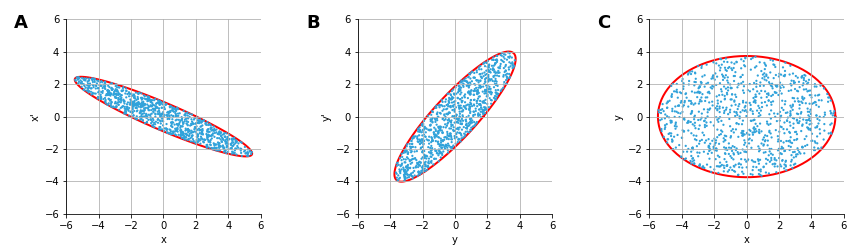

In [ ]:


import holoviews as hv
from holoviews import opts
hv.extension('matplotlib')

epsx = 5
betx = 6
alfx = 2.5
gamx = (1+alfx**2)/betx

epsy = 7
bety = 2
alfy = -1.9
gamy = (1+alfy**2)/bety

x_max  = np.sqrt(epsx*betx)
xp_max = np.sqrt(epsx*gamx)
y_max  = np.sqrt(epsy*bety)
yp_max = np.sqrt(epsy*gamy)

print(F"x_max = {x_max:10.5f}, x'_max = {xp_max:10.5f}")
print(F"y_max = {y_max:10.5f}, y'_max = {yp_max:10.5f}")

betxn = betx / epsx
alfxn = alfx / epsx
gamxn = gamx / epsx

betyn = bety / epsy
alfyn = alfy / epsy
gamyn = gamy / epsy

Qx = np.array([[gamxn,alfxn],[alfxn,betxn]])
Lx = np.linalg.cholesky(Qx)
Mx = np.linalg.inv(np.matrix.transpose(Lx))

Qy = np.array([[gamyn,alfyn],[alfyn,betyn]])
Ly = np.linalg.cholesky(Qy)
My = np.linalg.inv(np.matrix.transpose(Ly))

ang = np.linspace(0,2*np.pi,100)
XO = [[np.cos(a),np.sin(a)] for a in ang]

Xx = [np.matmul(Mx,XO[k]) for k in range(len(XO))]
Xy = [np.matmul(My,XO[k]) for k in range(len(XO))]

xxdim=hv.Dimension("x", range=(-6, 6))
xpdim=hv.Dimension("x'", range=(-6, 6))
yydim=hv.Dimension("y", range=(-6, 6))
ypdim=hv.Dimension("y'", range=(-6, 6))

Sx = hv.Curve((Xx)).redim(x=xxdim, y=xpdim).opts(show_grid=True, color="red")
Sy = hv.Curve((Xy)).redim(x=yydim, y=ypdim).opts(show_grid=True, color="red")
Sx+Sy

Np = 1000 # number of points
# x1 = np.random.normal(loc=0.0, scale=1.0, size=Np)
# x2 = np.random.normal(loc=0.0, scale=1.0, size=Np)
# x3 = np.random.normal(loc=0.0, scale=1.0, size=Np)
# x4 = np.random.normal(loc=0.0, scale=1.0, size=Np)

x1 = event[0]
x2 = event[1]
x3 = event[2]
x4 = event[3]

dim_x1 = hv.Dimension('x1', label='$x_1$', range=(-3,+3))
dim_x2 = hv.Dimension('x2', label='$x_2$', range=(-3,+3))
dim_x3 = hv.Dimension('x3', label='$x_3$', range=(-3,+3))
dim_x4 = hv.Dimension('x4', label='$x_4$', range=(-3,+3))

%opts Scatter [show_grid=True] (s=5.0)

Sc1 = hv.Scatter((x1,x2)).redim(x=dim_x1,y=dim_x2)
Sc2 = hv.Scatter((x3,x2)).redim(x=dim_x3,y=dim_x2)
Sc1+Sc2


n = np.sqrt(x1*x1 + x2*x2 + x3*x3 + x4*x4)
x1 = x1/n
x2 = x2/n
x3 = x3/n
x4 = x4/n
Sc1 = hv.Scatter((x1,x2)).redim(x=dim_x1,y=dim_x2)
Sc2 = hv.Scatter((x3,x2)).redim(x=dim_x3,y=dim_x2)
Sc1+Sc2


Q = np.array([[gamxn,alfxn,0,0],[alfxn,betxn,0,0],[0,0,gamyn,alfyn],[0,0,alfyn,betyn]])
L = np.linalg.cholesky(Q)
M = np.linalg.inv(np.matrix.transpose(L))
print(M)

XO4 = np.array([[x1[k],x2[k],x3[k],x4[k]] for k in range(Np)])
X = [np.matmul(M,XO4[k]) for k in range(Np)]
xx = np.array([X[k][0] for k in range(Np)])
xp = np.array([X[k][1] for k in range(Np)])
yy = np.array([X[k][2] for k in range(Np)])
yp = np.array([X[k][3] for k in range(Np)])

SR1 = hv.Scatter((xx,xp)).redim(x=xxdim, y=xpdim)
SR2 = hv.Scatter((yy,yp)).redim(x=yydim, y=ypdim)
SR3 = hv.Scatter((xx,yy)).redim(x=xxdim, y=yydim)

Mxy = np.array([[np.sqrt(epsx*betx),0],[0,np.sqrt(epsy*bety)]])
Xxy = [np.matmul(Mxy,XO[k]) for k in range(len(XO))]
Sxy = hv.Curve((Xxy)).redim(x=xxdim, y=yydim).opts(show_grid=True, color="red")

Sx*SR1+Sy*SR2+Sxy*SR3